In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('C:/Users/NBALUDEO/Desktop/ML project/Supervised ML/Titanic Dataset/train.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
512,513,1,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.0500,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [3]:
print('no of column:',df.shape[1])
print('no of row:',df.shape[0])

no of column: 12
no of row: 891


In [4]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [5]:
def null_list(df):
    
    mydict={}#an empty dictionary for storing null value percentage
    list1=[]
    for i in df.columns:
        if df[i].isnull().sum()>0: #this is to create a dictionary with columns which has null values.
            mydict[i]=round([(df.isnull().sum())*100 / len(df)][0][i],3)
    for j,k in mydict.items():
        list1.append(j)
    
    if len(list1)==0: 
        Message={"Message": "This dataset doesn't have any null values , kindly proceed with the EDA "} 
        
        return Message
    else:
        return mydict

In [6]:
null_list(df)

{'Age': 19.865, 'Cabin': 77.104, 'Embarked': 0.224}

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
a=[b for b in df.columns if df[b].isnull().sum()>1]
a

['Age', 'Cabin', 'Embarked']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Ctegorical column


In [12]:

cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# Numerical column

In [13]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        cat_col.append(i)
print(cat_col)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Handle the missing value

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='mean')
df['Age']= imputer.fit_transform(df['Age'].values.reshape(-1,1))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#df['col']=df['col'].fillna(df['col_name'].mode()[0])

In [16]:
# Change the datatype Age column float to integer
df['Age']=df['Age'].astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [18]:
df.isnull().any().value_counts()

False    10
True      2
Name: count, dtype: int64

In [19]:
#check unckness
df.apply(lambda x: len(x.unique()))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [20]:
# drop the cabin column because that in column are 75% missinge.
df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [21]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S
887,888,1,1,female,19,0,0,30.0000,S
888,889,0,3,female,29,1,2,23.4500,S
889,890,1,1,male,26,0,0,30.0000,C


In [22]:
# check the missing valu column
print([x for x in df.columns if df[x].isnull().sum()>0])

['Embarked']


In [24]:
imputer=SimpleImputer(strategy='most_frequent')
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
# check the missing value
[x for x in df.columns if df[x].isnull().sum()>0]

[]

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# check the coorelation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'male'

<Figure size 1000x600 with 0 Axes>

# Exploratory Data Analysis
* univariate analysis
* Bivariate Analysis

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64
0: Person not Survived
1: Person survived


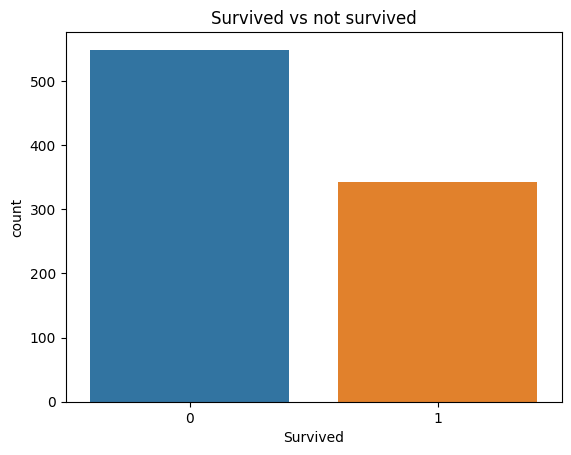

In [30]:
sns.countplot(x='Survived',data=df)
plt.title('Survived vs not survived')

# check the how many person survived in percent

print(df['Survived'].value_counts()/len(df['Survived'])*100)
print('0: Person not Survived')
print('1: Person survived')

ValueError: could not convert string to float: 'S'

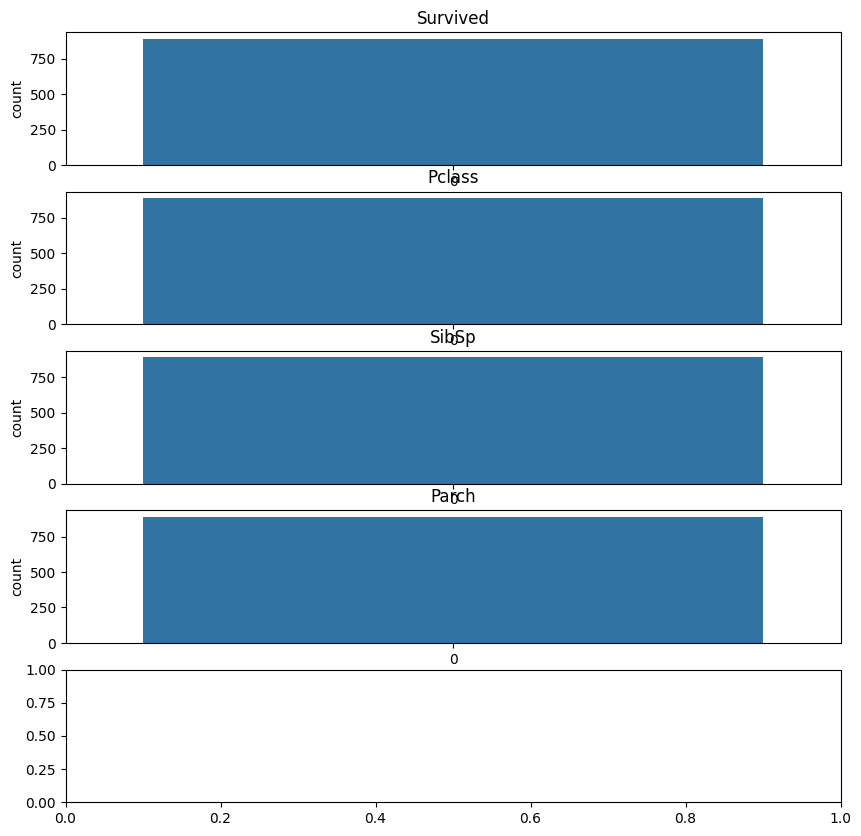

In [31]:
# column=df[['Survived','Pclass','SibSp','Parch','Embarked']]
# plt.figure(figsize=(10,10))
# for i in range(len(column.columns)):
#     plt.subplot(5,1,i+1)
#     sns.countplot(column[column.columns[i]])
#     plt.title(column.columns[i])

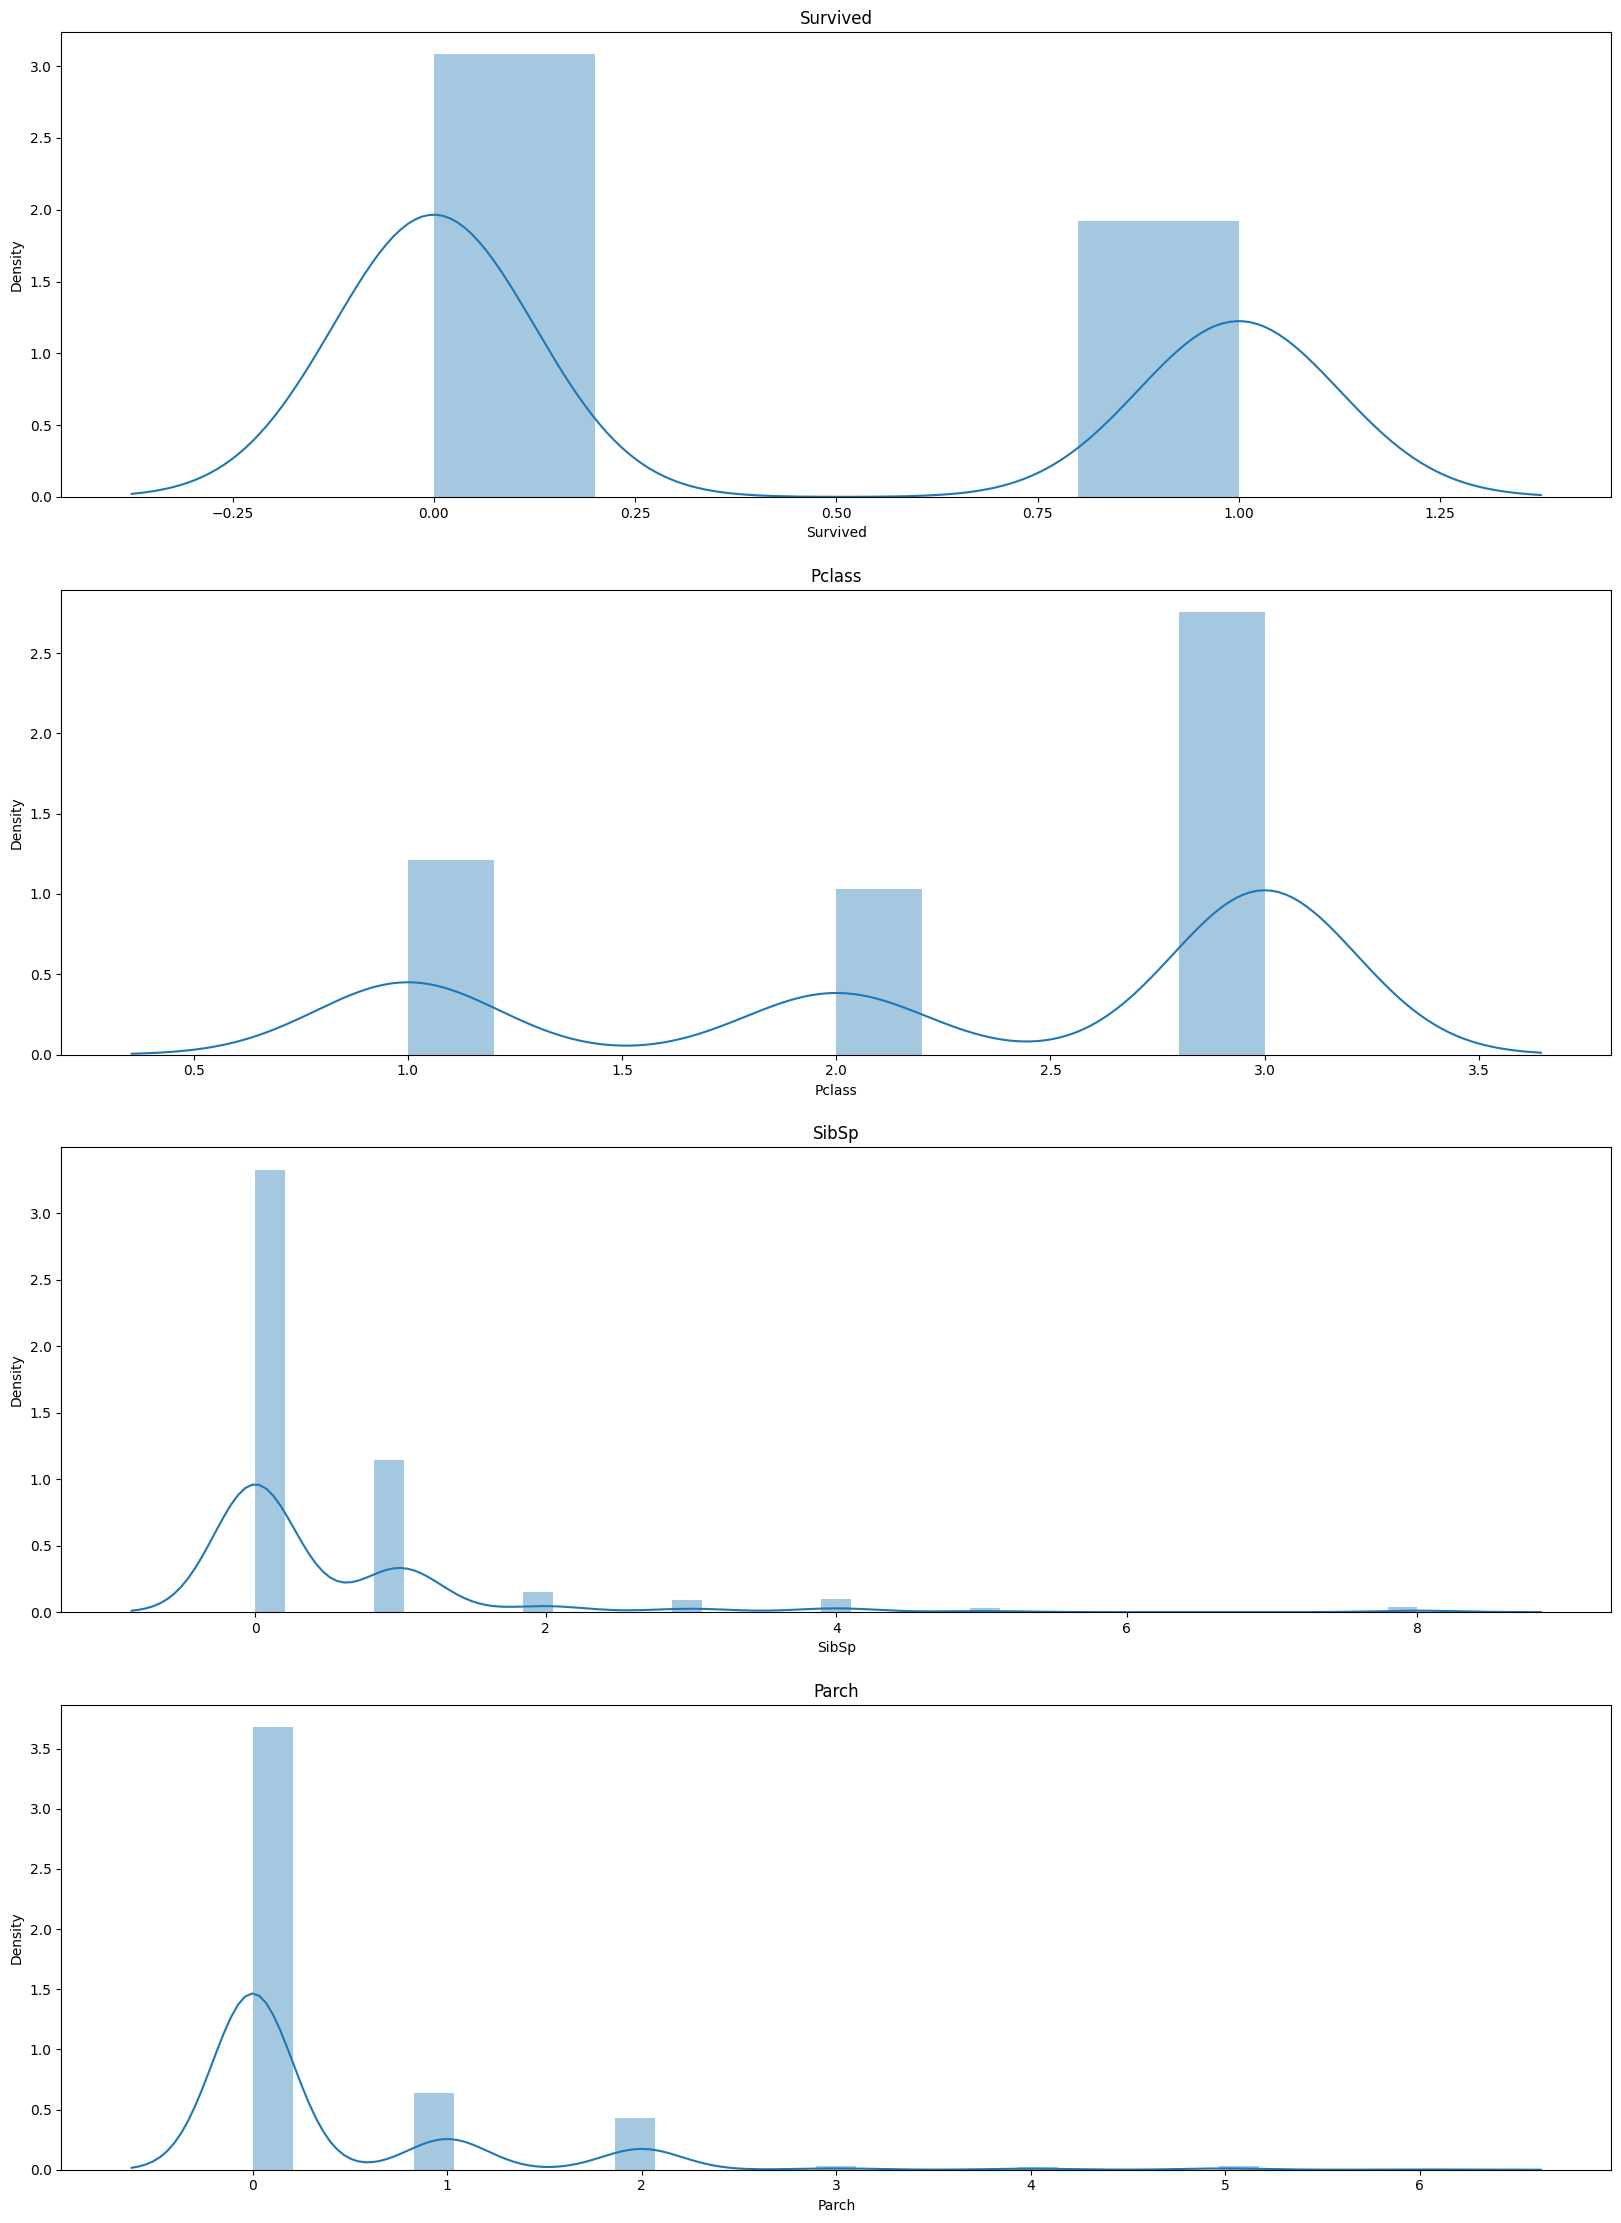

In [32]:
column=df[['Survived','Pclass','SibSp','Parch',]]
plt.figure(figsize=(20,35))
for i in range(len(column.columns)):
    plt.subplot(5,1,i+1)
    sns.distplot(column[column.columns[i]])
    plt.title(column.columns[i])

Survived,0,1
Sex,,
female,26.0,74.0
male,81.0,19.0


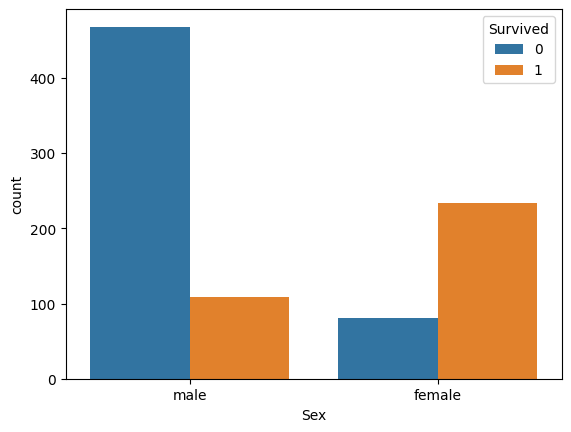

In [34]:
# survived column compair to gender column
sns.countplot(x='Sex',hue='Survived',data=df)
pd.crosstab(df['Sex'],df['Survived']).apply(lambda x: round(x/x.sum()*100),axis=1)

In [35]:
pd.crosstab(df['Sex'],df['Survived']).apply(lambda x: round(x/x.sum()*100),axis=1)


Survived,0,1
Sex,,
female,26.0,74.0
male,81.0,19.0


Survived,0,1
Parch,,
0,81.0,68.0
1,10.0,19.0
2,7.0,12.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,0.0,0.0


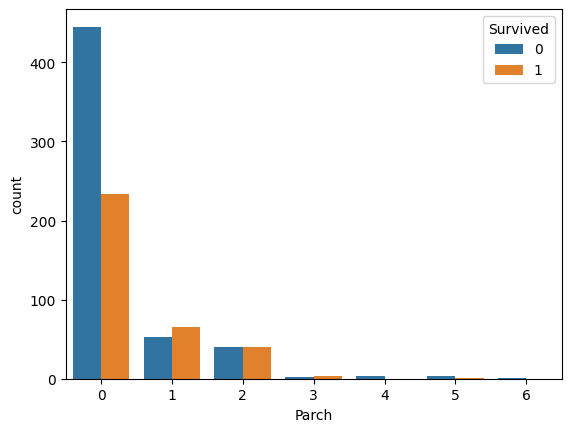

In [37]:
sns.countplot(x=df['Parch'],hue=df['Survived'])
pd.crosstab(df['Parch'],df['Survived']).apply(lambda x: round(x/x.sum()*100))

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


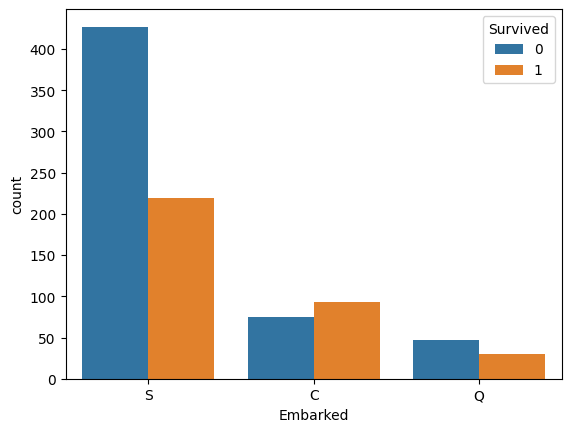

In [38]:
sns.countplot(x=df['Embarked'],hue=df['Survived'])

pd.crosstab(df['Embarked'],df['Survived']).apply(lambda r:round(r/r.sum()*100,1),axis=1)


<Axes: xlabel='Fare', ylabel='Density'>

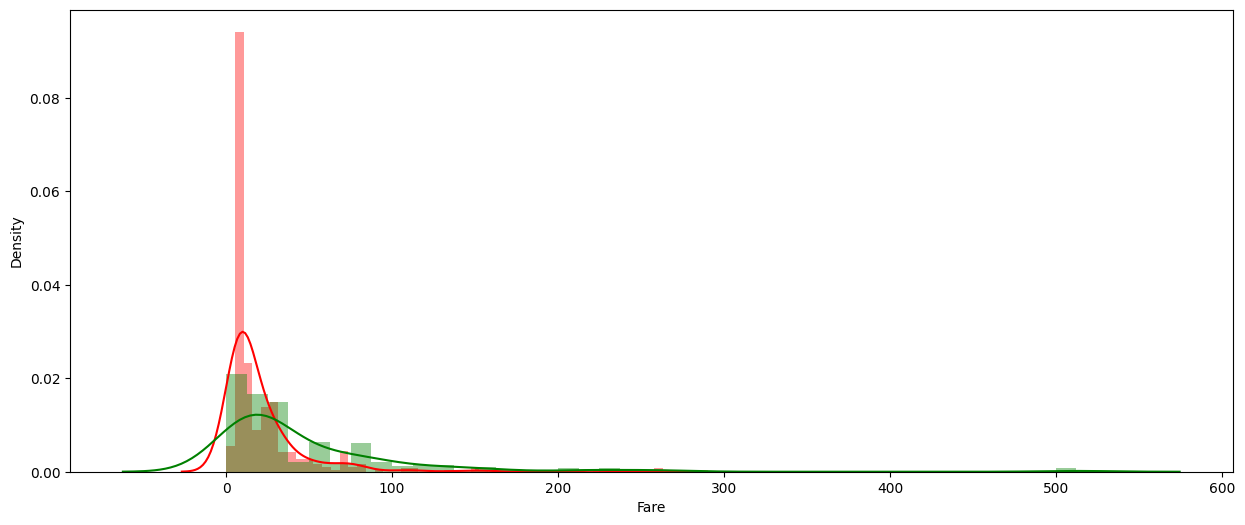

In [39]:
plt.figure(figsize=(15,6))
sns.distplot(x=df[df['Survived']==0]['Fare'],color='red')
sns.distplot(df[df['Survived']==1]['Fare'],color='green')

<Axes: xlabel='Age', ylabel='Density'>

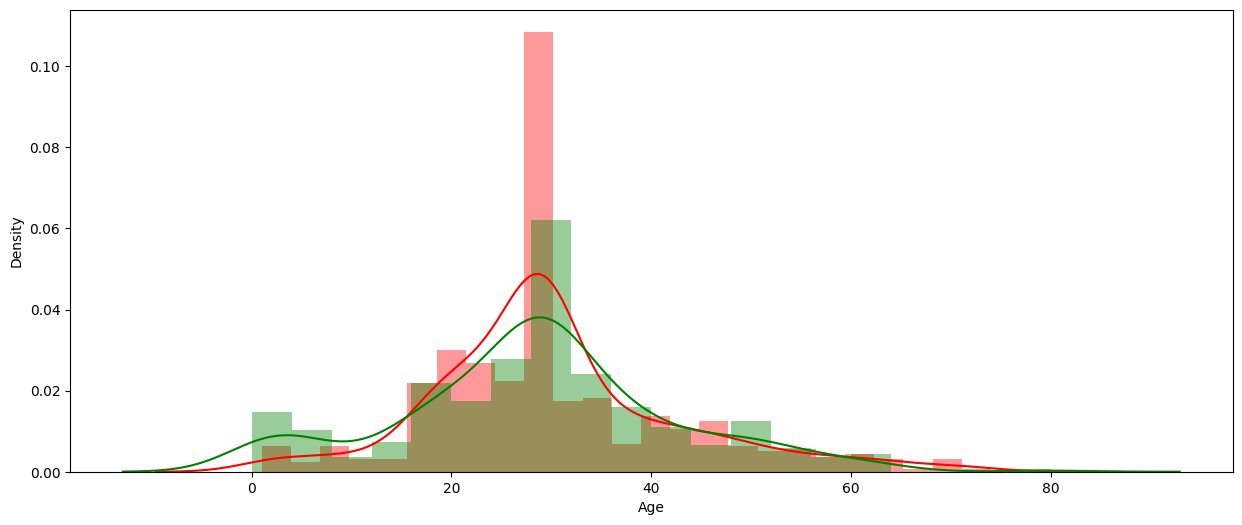

In [40]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'],color='red')
sns.distplot(df[df['Survived']==1]['Age'],color='green')

In [41]:
# we will create a new column by the name of family whih will be the sum of the sib and parch columns

df['Family']=df['Parch'] + df['SibSp']
pd.crosstab(df['Family'],df['Survived']).apply(lambda x: round(x/x.sum()*100),axis=1)

Survived,0,1
Family,,
0,70.0,30.0
1,45.0,55.0
2,42.0,58.0
3,28.0,72.0
4,80.0,20.0
5,86.0,14.0
6,67.0,33.0
7,100.0,0.0
10,100.0,0.0


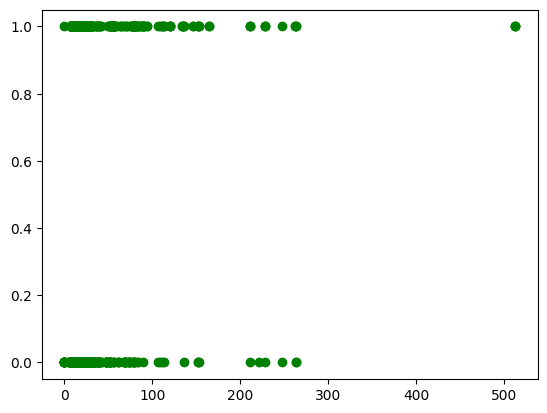

In [43]:
plt.scatter(df['Fare'],df['Survived'],c='g')


<Axes: xlabel='Age', ylabel='Fare'>

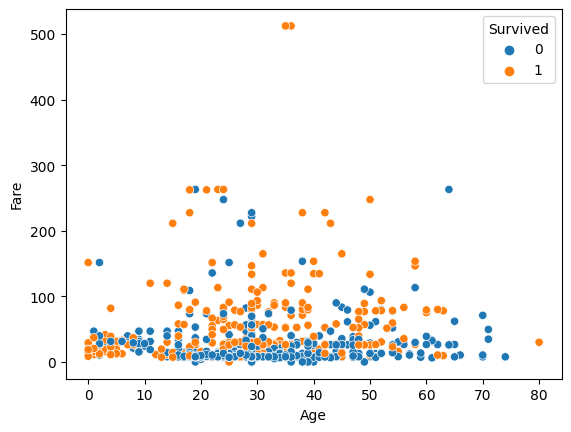

In [46]:
sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df['Survived'])

<Axes: xlabel='Family', ylabel='Fare'>

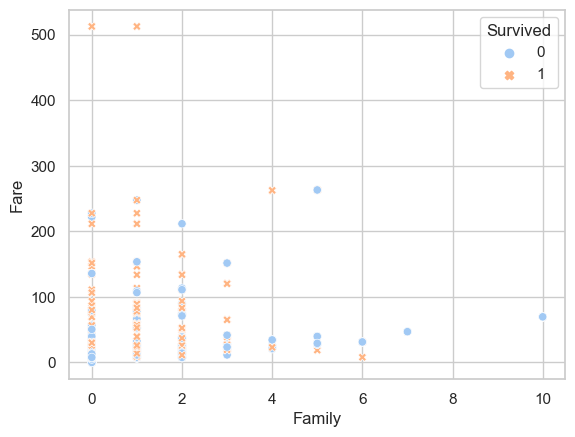

In [47]:
import seaborn as sns
sns.set(style='whitegrid')

sns.scatterplot(x='Family',y='Fare',data=df,hue='Survived',style='Survived',palette='pastel',)

<Axes: >

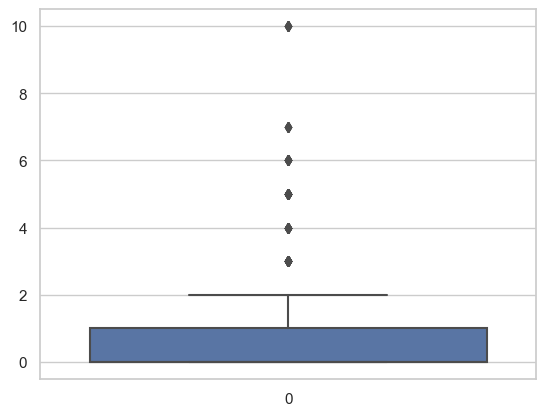

In [48]:
sns.boxplot(df['Family'])

<Axes: >

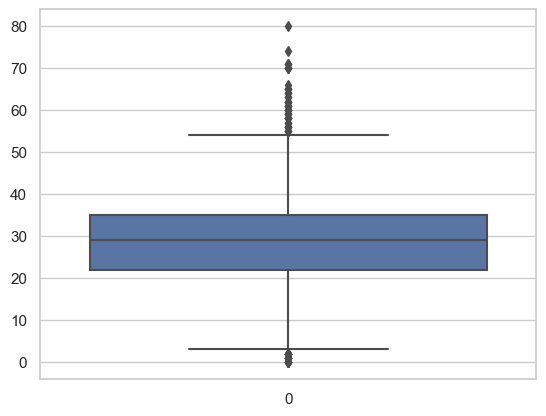

In [49]:
sns.boxplot(df['Age'])

In [50]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
750,751,1,2,female,4,1,1,23.0000,S,2
287,288,0,3,male,22,0,0,7.8958,S,0
771,772,0,3,male,48,0,0,7.8542,S,0
748,749,0,1,male,19,1,0,53.1000,S,1
89,90,0,3,male,24,0,0,8.0500,S,0


In [51]:
def family_type(family):
    if family ==0:
        return 'Alone'
    elif family <= 4:
        return 'Medium'
    else:
        return 'Large'
df['Family_type']=df['Family'].apply(family_type)

In [52]:
df2=df.copy()

In [53]:
df2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [54]:
df2['Embarked'].replace({'S':'South America','C':'central America','Q':'North America'},inplace=True)

In [55]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_type
0,1,0,3,male,22,1,0,7.2500,South America,1,Medium
1,2,1,1,female,38,1,0,71.2833,central America,1,Medium
2,3,1,3,female,26,0,0,7.9250,South America,0,Alone
3,4,1,1,female,35,1,0,53.1000,South America,1,Medium
4,5,0,3,male,35,0,0,8.0500,South America,0,Alone


In [56]:
df2.drop(['PassengerId','Parch','SibSp','Family'],axis=1,inplace=True)

In [57]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,precision_score,r2_score
#from sklearn.compose import ColumnTransformer

In [58]:

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
orde=OrdinalEncoder(categories=[['Alone','Medium','Large']])
df2['Family_type']=orde.fit_transform(df2[['Family_type']])

In [59]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_type
0,0,3,male,22,7.2500,South America,1.0
1,1,1,female,38,71.2833,central America,1.0
2,1,3,female,26,7.9250,South America,0.0
3,1,1,female,35,53.1000,South America,1.0
4,0,3,male,35,8.0500,South America,0.0


In [60]:
cat_col=[x for x in df2.columns if df2[x].dtypes=='O']
cat_col

['Sex', 'Embarked']

In [61]:
label1=LabelEncoder()
label2 = LabelEncoder()
df2['Sex'] = label1.fit_transform(df2[['Sex']])
df2['Embarked'] = label2.fit_transform(df2[['Embarked']])

In [62]:
df3=df2.copy()

<Axes: >

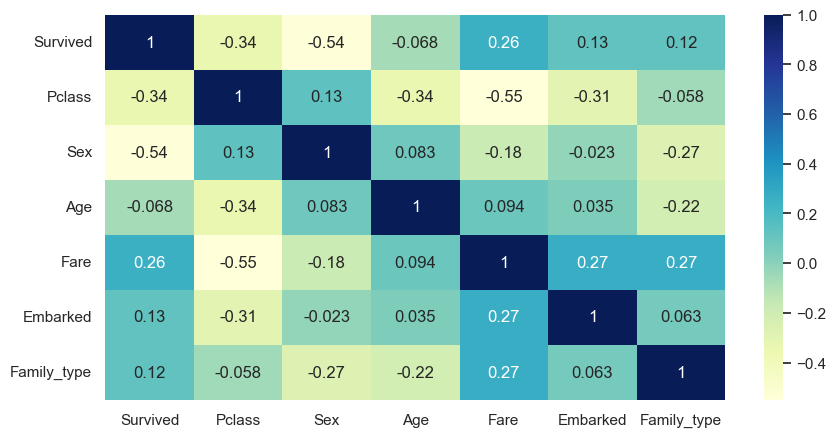

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(),annot=True,cmap='YlGnBu')

In [64]:
#df.rename(columns={'Embarked':'City'},inplace=True)

In [65]:
df3.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_type
369,1,1,0,24,69.300,2,0.0
775,0,3,1,18,7.750,1,0.0
742,1,1,0,21,262.375,2,1.0
754,1,2,0,48,65.000,1,1.0
168,0,1,1,29,25.925,1,0.0


In [66]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(df3.drop(['Survived'],axis=1),df3.Survived,test_size=0.25)

In [67]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Family_type
644,3,0,0,19.2583,2,1.0
582,2,1,54,26.0000,1,0.0
495,3,1,29,14.4583,2,0.0
230,1,0,35,83.4750,1,1.0
117,2,1,29,21.0000,1,1.0
...,...,...,...,...,...,...
887,1,0,19,30.0000,1,0.0
17,2,1,29,13.0000,1,0.0
563,3,1,29,8.0500,1,0.0
336,1,1,29,66.6000,1,1.0


In [68]:
y_test

286    1
658    0
358    1
816    0
164    0
      ..
410    0
447    1
854    0
183    1
701    1
Name: Survived, Length: 223, dtype: int64

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
rfc=RandomForestClassifier(criterion='gini',n_estimators=50)
lr=LogisticRegression()

In [70]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [71]:
lr.fit(X_train,y_train)

LogisticRegression()

In [72]:
#model prediction on random forest classifier
X_train_prediction=rfc.predict(X_train)
X_test_prediction=rfc.predict(X_test)

In [73]:
print('claasification report',classification_report(X_train_prediction,y_train))

claasification report               precision    recall  f1-score   support

           0       1.00      0.97      0.98       421
           1       0.95      1.00      0.97       247

    accuracy                           0.98       668
   macro avg       0.97      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



In [74]:
accuracy_score(X_train_prediction, y_train)

0.9775449101796407

In [75]:
print('claasification report',classification_report(X_test_prediction,y_test))

claasification report               precision    recall  f1-score   support

           0       0.86      0.82      0.84       147
           1       0.68      0.74      0.71        76

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.80      0.79      0.80       223



In [76]:
#model prediction on logistic regression
lr_prediction=lr.predict(X_train)
lr_prediction=lr.predict(X_test)

In [77]:
lr_prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0], dtype=int64)

In [78]:
# working on test data set

In [89]:
test_data=pd.read_csv('C:/Users/NBALUDEO/Desktop/ML project/Supervised ML/Titanic Dataset/test.csv')

In [90]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [91]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [92]:
test_data['Sex'] = test_data['Sex'].replace({'males':'male'})

In [93]:
passenger_id = test_data['PassengerId']

In [94]:
test_data.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [95]:
def preprocess(data):
    data['Age']= data['Age'].fillna(data['Age'].mean())
    data['Age']=data['Age'].astype('int64')
#     data.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
    data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Family']=data['Parch'] + data['SibSp']
    data['Family_type']=data['Family'].apply(family_type)
    data['Embarked'].replace({'S':'South America','C':'central America','Q':'North America'},inplace=True)
    data.drop(['PassengerId','Parch','SibSp','Family'],axis=1,inplace=True)
    data['Family_type']=orde.fit_transform(data[['Family_type']])
    data['Sex'] = label1.transform(data[['Sex']])
    data['Embarked'] = label2.transform(data[['Embarked']])
    return data

In [96]:
clean_data = preprocess(test_data)

In [97]:
clean_data

,Pclass,Sex,Age,Fare,Embarked,Family_type
0,3,1,34,7.8292,0,0.0
1,3,0,47,7.0000,1,1.0
2,2,1,62,9.6875,0,0.0
3,3,1,27,8.6625,1,0.0
4,3,0,22,12.2875,1,1.0
...,...,...,...,...,...,...
413,3,1,30,8.0500,1,0.0
414,1,0,39,108.9000,2,0.0
415,3,1,38,7.2500,1,0.0
416,3,1,30,8.0500,1,0.0


In [98]:
clean_data.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_type    0
dtype: int64

# Random forest classifier

In [99]:
predictions = rfc.predict(clean_data)


In [100]:
test_data['Sex'].unique()

array([1, 0])

In [105]:
passenger_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [102]:
sub = pd.concat([passenger_id,pd.DataFrame(predictions)],axis=1)

In [103]:
sub.columns = ['PassengerId','Survived']

In [104]:
sub.to_csv('titanic_predictions.csv', index=False)

# logistic regression

In [106]:
lr_predictions = lr.predict(clean_data)

In [107]:
sub2=pd.concat([passenger_id,pd.DataFrame(lr_predictions)],axis=1)

In [108]:
sub2.columns = ['PassengerId','Survived']

In [109]:
sub2.to_csv('lr_tiatanic_prediction.csv',index=False)

In [110]:
sub2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
